Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Explained Variance Ratio of each component: [0.72962445 0.22850762 0.03668922 0.00517871]


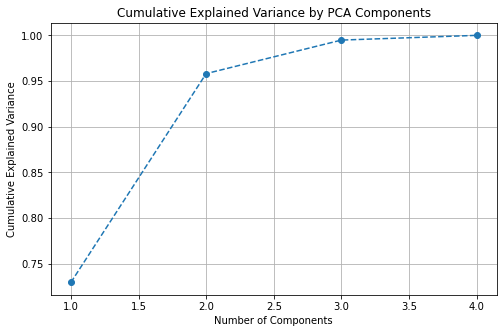

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.979285163571385


In [1]:
# Step 2: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 3: Load Iris dataset and convert it into a Pandas dataframe
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Step 4: Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Calculate covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

# Step 5: Fit the scaled data into PCA object
# We can also analyze explained variance ratio to find optimal components
pca = PCA(n_components=4)  # Start with all components
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:", explained_variance)

# Plot cumulative explained variance to find optimal number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, 5), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Now apply PCA with optimal number of components (say 3, based on cumulative variance)
pca_optimal = PCA(n_components=3)
X_pca = pca_optimal.fit_transform(X_scaled)

# Step 6: Print variation before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))

# Step 7: Stop


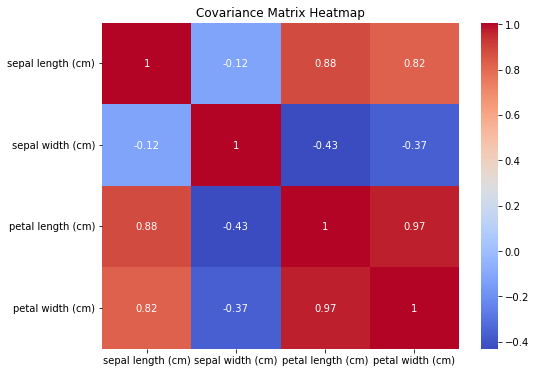

Explained Variance Ratio of each component: [0.72962445 0.22850762 0.03668922 0.00517871]


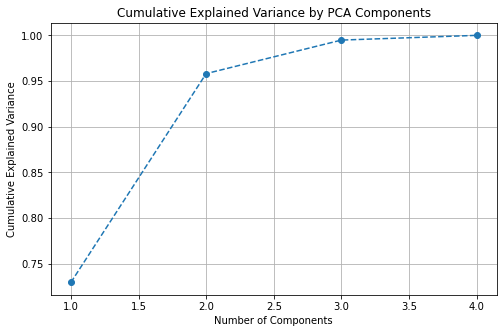

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.979285163571385


In [2]:
# Step 2: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 3: Load Iris dataset and convert it into a Pandas dataframe
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Step 4: Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Calculate covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Create a heatmap for the covariance matrix
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix Heatmap')
plt.show()

# Step 5: Fit the scaled data into PCA object
pca = PCA(n_components=4)  # Start with all components
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:", explained_variance)

# Plot cumulative explained variance to find optimal number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, 5), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Apply PCA with optimal number of components (3 here)
pca_optimal = PCA(n_components=3)
X_pca = pca_optimal.fit_transform(X_scaled)

# Step 6: Print variation before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))

# Step 7: Stop


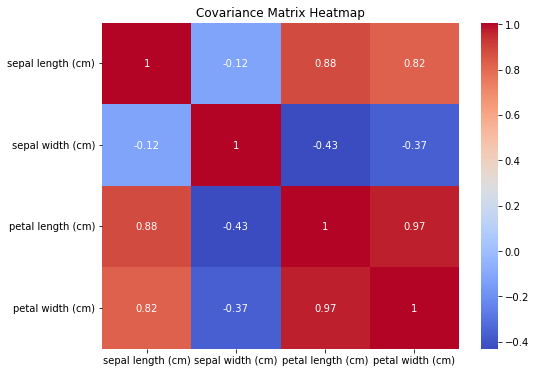

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.979285163571385


In [3]:
# Step 2: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 3: Load Iris dataset and convert it into a Pandas dataframe
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Step 4: Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Calculate covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Create a heatmap for the covariance matrix
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix Heatmap')
plt.show()

# Step 5: Fit the scaled data into PCA object with 3 components
pca_optimal = PCA(n_components=3)
X_pca = pca_optimal.fit_transform(X_scaled)

# Step 6: Print variation before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))

# Step 7: Stop


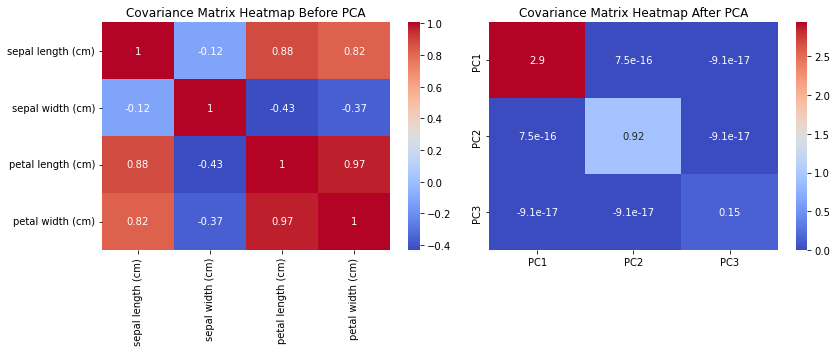

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.979285163571385


In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Iris dataset and convert into DataFrame
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Covariance matrix before PCA
cov_before = np.cov(X_scaled.T)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Covariance matrix after PCA
cov_after = np.cov(X_pca.T)

# Plot heatmap of covariance matrix before PCA
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(cov_before, annot=True, cmap='coolwarm', 
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix Heatmap Before PCA')

# Plot heatmap of covariance matrix after PCA
plt.subplot(1, 2, 2)
sns.heatmap(cov_after, annot=True, cmap='coolwarm',
            xticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])],
            yticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])])
plt.title('Covariance Matrix Heatmap After PCA')

plt.tight_layout()
plt.show()

# Print variance before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))
